## Chapter 9  -  Support Vector Machine

In [50]:
import numpy as np
import pandas as pd
import patsy as pt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


from sklearn import preprocessing
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_moons, make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

**4. Generate a simulated two-class data set with 100 observations and two features in which there is a visible but non-linear separation between the two classes.**

In [18]:
n_samples = 100
noise     = .3
X_train, y_train = make_moons(n_samples=n_samples, noise=noise, random_state=0)
X_test, y_test = make_moons(n_samples=n_samples, noise=noise, random_state=1)

# Scale data
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

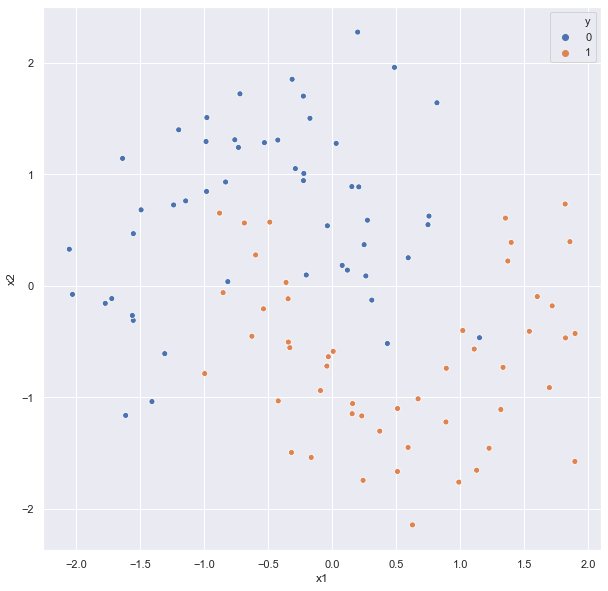

In [20]:
df = pd.concat([pd.DataFrame(data=X_train, columns=['x1', 'x2']), pd.Series(y_train, name='y')], axis=1)
plt.figure(figsize=(10, 10))
sns.scatterplot(x='x1', y='x2', hue='y', data=df);

## ... Show that in this setting, a support vector machine with a polynomial kernel (with degree greater than 1) or a radial kernel will outperform a support vector classifier on the training data. Which technique performs best on the test data? Make plots and report training and test error rates in order to back up your assertions.

In [54]:
def plot_clf(model,df,grid_range,show_contours=False, show_support_vectors=False):
    
    #define the grid
    x1=grid_range
    x2=grid_range
    xx1, xx2 = np.meshgrid(x1, x2, sparse=False)
    #print(xx1.flatten())
    Xgrid = np.stack((xx1.flatten(), xx2.flatten())).T
    #print(Xgrid)
    
    # Get decision boundary values for plot grid
    decision_boundary      = model.predict(Xgrid)
    decision_boundary_grid = decision_boundary.reshape(len(x2), len(x1))
    
    # Get decision function values for plot grid
    decision_function      = model.decision_function(Xgrid)
    decision_function_grid = decision_function.reshape(len(x2), len(x1))
    
    fig = plt.figure(figsize=(10, 10))
    if show_contours:
        plt.contourf(x1, x2, decision_function_grid);
    plt.contour(x1, x2, decision_boundary_grid);
    
    sns.scatterplot(x='x1', y='x2', hue='y', data=df)
    if show_support_vectors:
        sns.scatterplot(x=model.support_vectors_[:,0], y=model.support_vectors_[:,1], color='red', marker='+', s=500)
    plt.show();
    
    

**Linear Kernel**

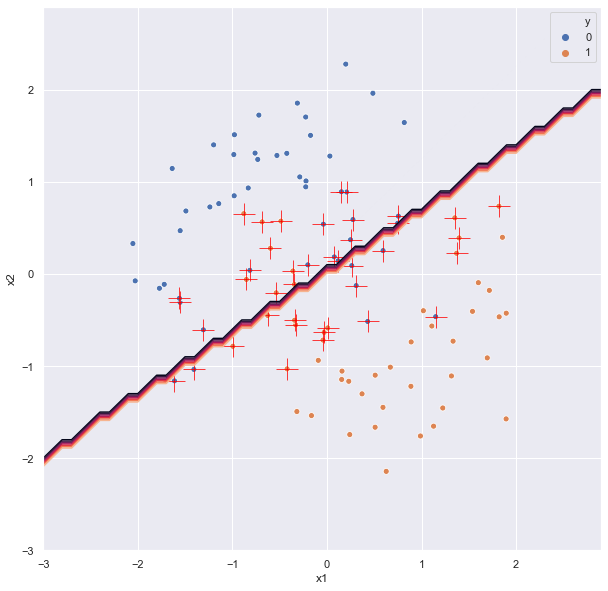

Training accuracy: 0.85
Test accuracy    : 0.83


In [55]:
model = svm.SVC(kernel='linear',gamma=1,C=1,random_state=0, probability=True).fit(X_train, y_train)

plot_clf(model,df,np.arange(-3,3,0.1),show_contours=False,show_support_vectors=True)

print(f'Training accuracy: {model.score(X_train, y_train)}')
print(f'Test accuracy    : {model.score(X_test, y_test)}')

**Polinomial Kernel**

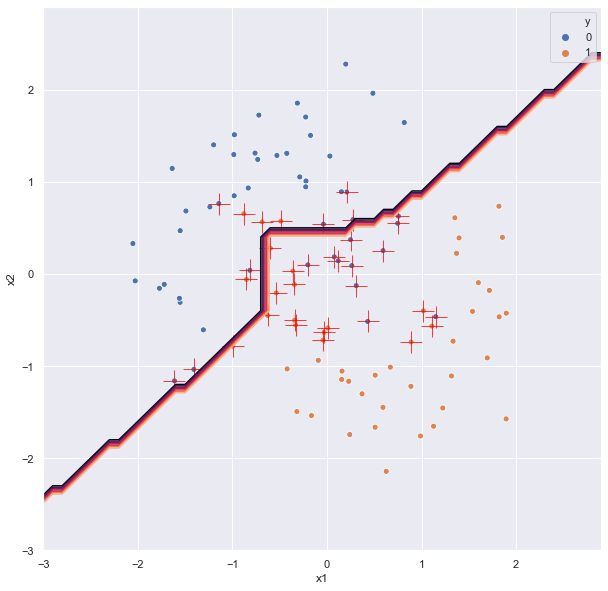

Training accuracy: 0.85
Test accuracy    : 0.87


In [56]:
model = svm.SVC(kernel='poly',degree=3,gamma=1,C=1,random_state=0, probability=True).fit(X_train, y_train)

plot_clf(model,df,np.arange(-3,3,0.1),show_contours=False,show_support_vectors=True)

print(f'Training accuracy: {model.score(X_train, y_train)}')
print(f'Test accuracy    : {model.score(X_test, y_test)}')

**Radial kernel**

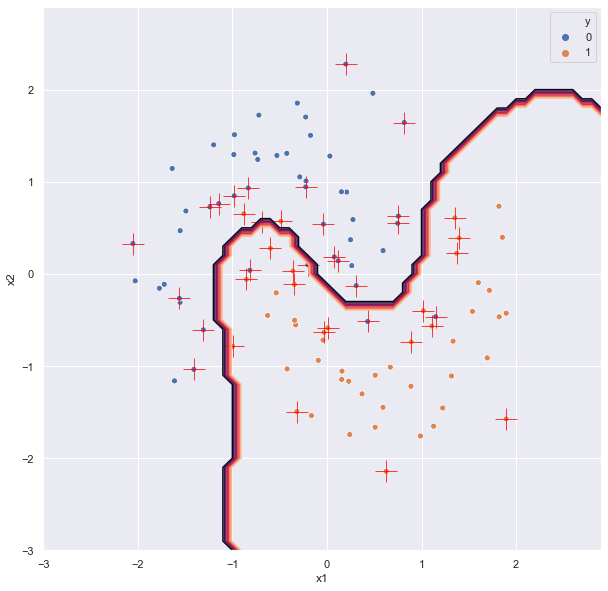

Training accuracy: 0.93
Test accuracy    : 0.91


In [58]:
model = svm.SVC(kernel='rbf',C=1,gamma=1,probability=True,random_state=0).fit(X_train,y_train)

plot_clf(model,df,np.arange(-3,3,0.1),show_support_vectors=True)
print(f'Training accuracy: {model.score(X_train, y_train)}')
print(f'Test accuracy    : {model.score(X_test, y_test)}')

**Comment**

In this setting an SVM with a radial kernel outperforms both linear and polynomial kernel models. The linear kernel model is the least effective because the data is not linearly separable.

## 5. We have seen that we can fit an SVM with a non-linear kernel in order to perform classification using a non-linear decision boundary. We will now see that we can also obtain a non-linear decision boundary by performing logistic regression using non-linear transformations of the features.

**(a) Generate a data set with n = 500 and p = 2, such that the observations belong to two classes with a quadratic decision boundary between them. For instance, you can do this as follows:**

In [131]:
np.random.seed(0)
x1 = np.random.uniform(0, 1, 500) - 0.5
x2 = np.random.uniform(0, 1, 500) - 0.5
y = 1*(x1**2 - x2**2 > 0)


**(b) Plot the observations, colored according to their class labels. Your plot should display X1 on the x-axis, and X2 on the y- axis.**

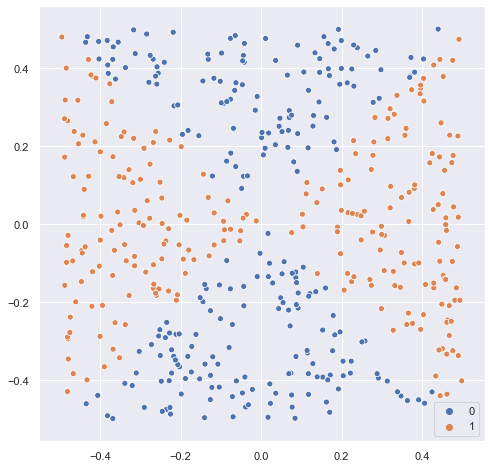

In [132]:
df = pd.DataFrame({'x1':x1,'x2':x2,'y':y})
plt.figure(figsize=(8,8))
sns.scatterplot(x=x1,y=x2,hue = y)
plt.show()

**(c) Fit a logistic regression model to the data, using X1 and X2 as predictors.**

**(d) Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The decision boundary should be linear.**

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy: 0.5443548387096774
Test accuracy    : 0.5238095238095238


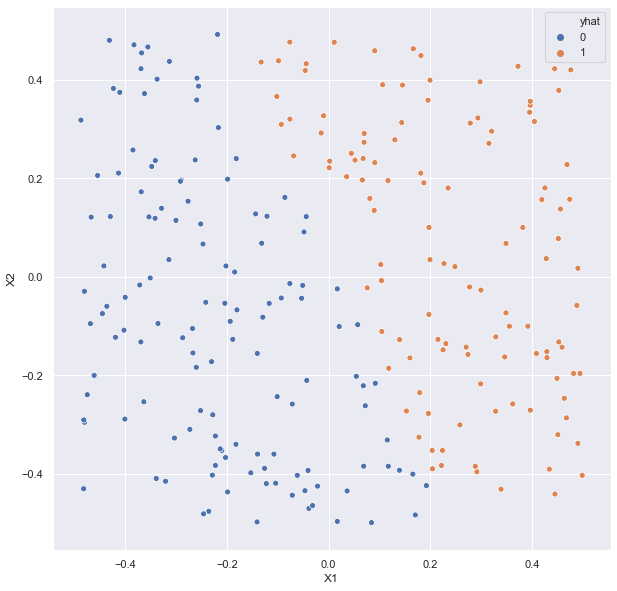

In [121]:
train = np.random.random(len(y)) > 0.5

X_train = df[['x1','x2']][train]
y_train= df[['y']][train]
X_test = df[['x1','x2']][~train]
y_test = df[['y']][~train]

logmodel = LogisticRegression(random_state=0).fit(X_train,y_train)
log_yhat = logmodel.predict(X_train)

df2 = pd.DataFrame({'X1':X_train['x1'],'X2':X_train['x2'],'yhat':log_yhat})

plt.figure(figsize=(10,10))
sns.scatterplot(x='X1',y='X2',hue='yhat',data=df2)

print(f'Training accuracy: {model.score(X[train], y[train])}')
print(f'Test accuracy    : {model.score(X[~train], y[~train])}')

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


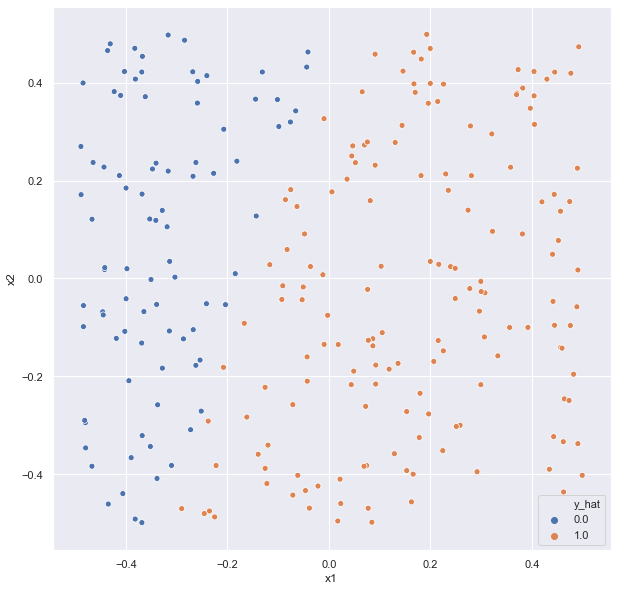

Training accuracy: 0.40816326530612246
Test accuracy    : 0.40784313725490196


In [122]:
# Pre-process data with only linear features
f = 'y ~ x1 + x2'
y, X = pt.dmatrices(f, df)
y = np.ravel(y)

train = np.random.random(len(y)) > 0.5

# Fit model on training set
model = LogisticRegression().fit(X[train], y[train])
# Predict
y_hat = model.predict(X[train])

# Plot data
plot_df = pd.DataFrame({'x1':X[train][:,1], 'x2':X[train][:,2], 'y_hat':y_hat})
plt.figure(figsize=(10, 10))
sns.scatterplot(x='x1', y='x2', hue='y_hat', data=plot_df)
plt.show();

print(f'Training accuracy: {model.score(X[train], y[train])}')
print(f'Test accuracy    : {model.score(X[~train], y[~train])}')

**(e) Now fit a logistic regression model to the data using non-linear functions of X1 and X2 as predictors (e.g. X12, X1 ×X2, log(X2), and so forth).**

**(f) Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The decision boundary should be obviously non-linear. If it is not, then repeat (a)-(e) until you come up with an example in which the predicted class labels are obviously non-linear.**

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training accuracy: 0.9714285714285714
Test accuracy    : 0.9686274509803922


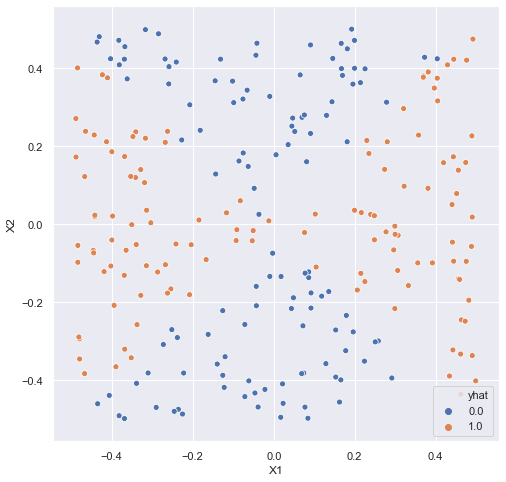

In [136]:
f = 'y ~ x1 + x2 + np.power(x1,2) + np.power(x2,2)'
y,X = pt.dmatrices(f,df)
y = np.ravel(y)

logmodelnonlinear = LogisticRegression().fit(X[train],y[train])
y_hatnonlinear = logmodelnonlinear.predict(X[train])

df3 = pd.DataFrame({'X1':X[train][:,1], 'X2':X[train][:,2],'yhat':y_hatnonlinear})

plt.figure(figsize=(8,8))
sns.scatterplot(x='X1',y='X2',hue='yhat',data=df3)

print(f'Training accuracy: {logmodelnonlinear.score(X[train], y[train])}')
print(f'Test accuracy    : {logmodelnonlinear.score(X[~train], y[~train])}')

**(g) Fit a support vector classifier to the data with X1 and X2 as predictors. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.**

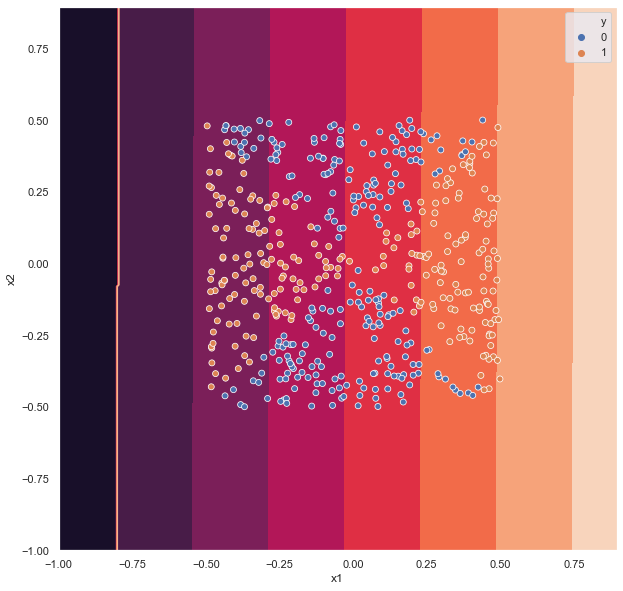

Training accuracy: 0.5061224489795918
Test accuracy    : 0.48627450980392156


In [138]:
f = 'y ~ x1 + x2 - 1'
y, X = pt.dmatrices(f, df)
y = np.ravel(y)

model = svm.SVC(kernel='linear', gamma=1, C=1, random_state=0, probability=True).fit(X[train], y[train])

plot_clf(model, df, np.arange(-1, .9, .005), show_contours=True)

print(f'Training accuracy: {model.score(X[train], y[train])}')
print(f'Test accuracy    : {model.score(X[~train], y[~train])}')

**(h) Fit a SVM using a non-linear kernel to the data. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.**

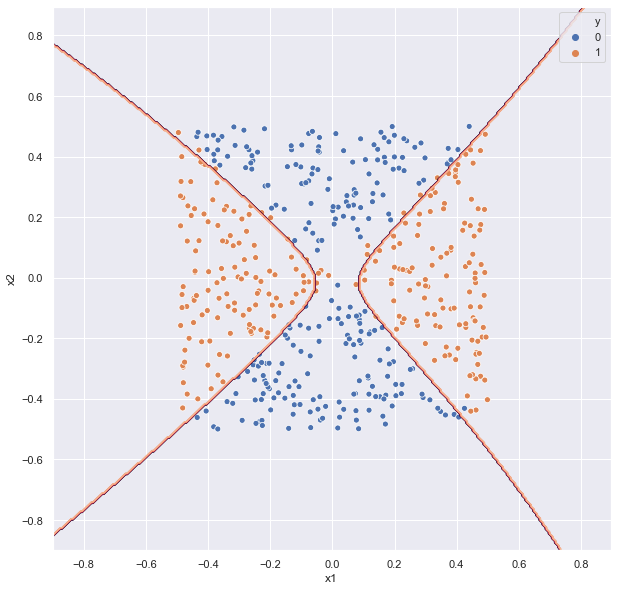

Training accuracy: 0.963265306122449
Test accuracy    : 0.9568627450980393


In [137]:
f = 'y ~ x1 + x2 - 1'
y, X = pt.dmatrices(f, df)
y = np.ravel(y)

model = svm.SVC(kernel='rbf', gamma=1, C=1, random_state=0, probability=True).fit(X[train], y[train])

plot_clf(model, df, np.arange(-.9, .9, .005))

print(f'Training accuracy: {model.score(X[train], y[train])}')
print(f'Test accuracy    : {model.score(X[~train], y[~train])}')

**(i) Comment on your results.**

Polynomial logistic regression and SVM with radial kernel achieve similar fits to the data. The logistic performs best on the test set with an accuracy of 95% compared to 96% from logistic regression.

The linear support vector classifier achieves poor results because the seperation between classes is far from linear.

## 6. At the end of Section 9.6.1, it is claimed that in the case of data that is just barely linearly separable, a support vector classifier with a small value of cost that misclassifies a couple of training observations may perform better on test data than one with a huge value of cost that does not misclassify any training observations. You will now investigate this claim.**

**(a) Generate two-class data with p = 2 in such a way that the classes are just barely linearly separable.**

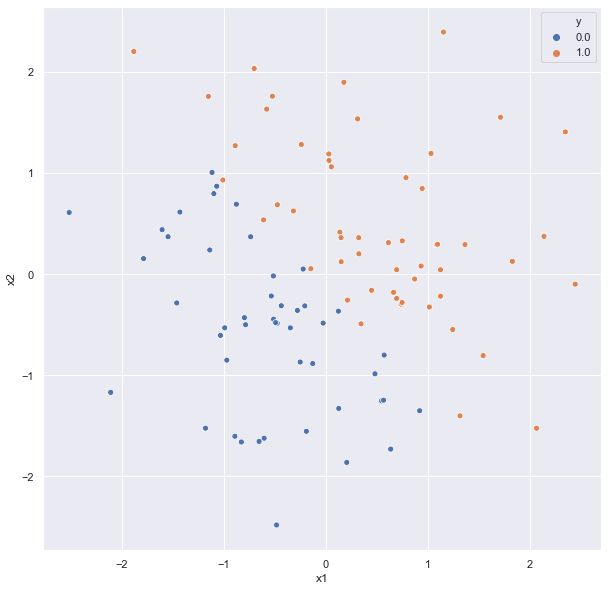

In [143]:
# Generate sample data

X, _ = make_blobs(n_samples=200, centers=1, n_features=2, random_state=0)
y = np.zeros(len(X))
y[np.sum(X, axis=1) > 5] = 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

# Scale data
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

# Plot data
plot_df = pd.DataFrame({'x1':X_train[:,0], 'x2':X_train[:,1], 'y':y_train})
plt.figure(figsize=(10, 10))
sns.scatterplot(x='x1', y='x2', hue='y', data=plot_df)
plt.show();

**(b) Compute the cross-validation error rates for support vector classifiers with a range of cost values. How many training errors are misclassified for each value of cost considered, and how does this relate to the cross-validation errors obtained?**

**(c) Generate an appropriate test data set, and compute the test errors corresponding to each of the values of cost considered. Which value of cost leads to the fewest test errors, and how does this compare to the values of cost that yield the fewest training errors and the fewest cross-validation errors?**

In [151]:
costs = np.logspace(-5,10,10)
scores = []
for c in costs:
    model = svm.SVC(C=c,kernel='linear',probability=True,random_state=0)
    train_score = np.mean(cross_val_score(model,X_train,y_train,cv=10))
    model = svm.SVC(C=c,kernel='linear',probability=True,random_state=0).fit(X_train,y_train)
    test_score = model.score(X_test,y_test)
    scores += [[c,train_score,test_score]]

df4 = pd.DataFrame({'Cost':np.array(scores)[:,0],'Train Score': np.array(scores)[:,1],
                   'Test Score': np.array(scores)[:,2]})
display(df4)

,Cost,Train Score,Test Score
0,1.000000e-05,0.530303,0.57
1,4.641589e-04,0.530303,0.57
2,2.154435e-02,0.920505,1.00
3,1.000000e+00,0.942525,0.94
4,4.641589e+01,0.969798,0.96
5,2.154435e+03,1.000000,0.97
6,1.000000e+05,1.000000,0.97
7,4.641589e+06,1.000000,0.97
8,2.154435e+08,1.000000,0.97
9,1.000000e+10,1.000000,0.97


Text(0, 0.5, 'accuracy')

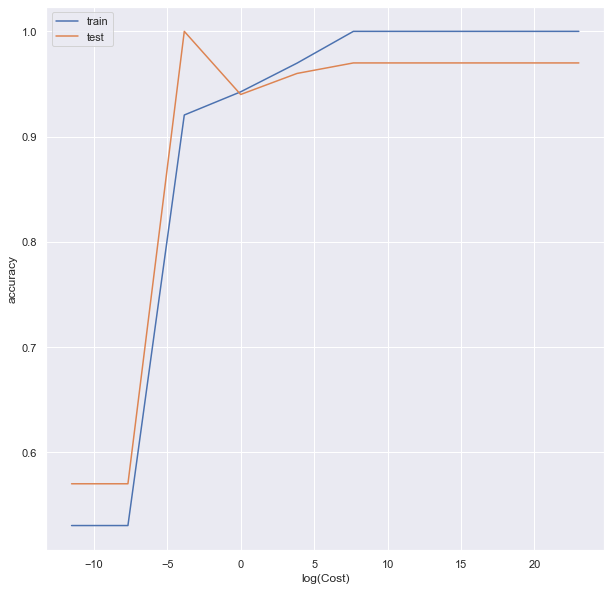

In [154]:
df4['log(Cost)'] = np.log(df4['Cost'])

plt.figure(figsize=(10,10))
sns.lineplot(x='log(Cost)', y='Train Score', data=df4, label='train')
sns.lineplot(x='log(Cost)', y='Test Score', data=df4, label='test')
plt.ylabel('accuracy')

**(d) Discuss your results.**

Comment For high values of Cost the model achieves perfect training accuracy. The best test accuracy is also perfect but this is achieved for a lower cost value.

This suggests that the model starts to overfit as cost becomes too high

## 7. In this problem, you will use support vector approaches in order to predict whether a given car gets high or low gas mileage based on the Auto data set.

In [172]:
auto = pd.read_csv('Auto.csv')
auto = auto.drop(auto[auto.values=='?'].index)

quants = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']
auto[quants] = auto[quants].astype(np.float64)
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,ford mustang gl
393,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,vw pickup
394,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,dodge rampage
395,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,ford ranger


**(a) Create a binary variable that takes on a 1 for cars with gas mileage above the median, and a 0 for cars with gas mileage below the median.**

In [173]:
auto['mpg_above_median'] = (auto['mpg']>auto['mpg'].median())*1.

In [176]:
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg_above_median
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu,0.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320,0.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite,0.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst,0.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino,0.0
...,...,...,...,...,...,...,...,...,...,...
392,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,ford mustang gl,1.0
393,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,vw pickup,1.0
394,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,dodge rampage,1.0
395,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,ford ranger,1.0


**(b) Fit a support vector classifier to the data with various values of cost, in order to predict whether a car gets high or low gas mileage. Report the cross-validation errors associated with different values of this parameter. Comment on your results.**

In [182]:
cost = np.logspace(-5,2,20)
f = 'mpg_above_median ~ cylinders + displacement + horsepower + weight + acceleration + year + C(origin)'
y, X = pt.dmatrices(f, auto)

# Scale data
X = preprocessing.scale(X)
y = np.ravel(y)

results=[]
for c in costs:
    model = svm.SVC(C=c,kernel='linear',random_state=0)
    score = np.mean(cross_val_score(model,preprocessing.scale(X),y,cv=10))
    results +=[[c,score]]
    
df5 = pd.DataFrame({'Cost':np.array(results)[:,0],'Score':np.array(results)[:,1]})
df5




,Cost,Score
0,0.000010,0.789474
1,0.000023,0.789474
2,0.000055,0.789474
3,0.000127,0.789474
4,0.000298,0.789474
5,0.000695,0.832500
6,0.001624,0.881711
7,0.003793,0.894868
8,0.008859,0.908026
9,0.020691,0.913289


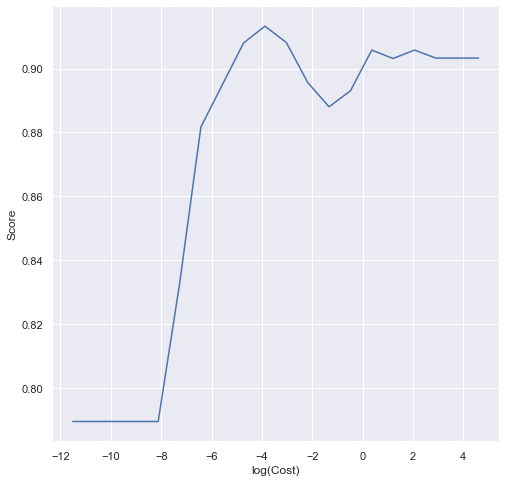

In [187]:
df5['log(Cost)'] = np.log(df5['Cost'])

plt.figure(figsize=(8,8))
sns.lineplot(y='Score',x='log(Cost)',data=df5)

**(c) Now repeat (b), this time using SVMs with radial and polynomial basis kernels, with different values of gamma and degree and cost. Comment on your results.**

In [189]:
C_range = np.logspace(-5,3,10)
gama_range = np.logspace(-5,2,10)
kernels= ['rbf','poly']
degrees     = [3, 5, 7, 9]
param_grid  = dict(gamma=gama_range, C=C_range, kernel=kernels, degree=degrees)
rbf_grid = GridSearchCV(svm.SVC(cache_size=2000),param_grid,cv=5, 
                        scoring='accuracy', return_train_score=True)
rbf_grid.fit(X, y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.00000000e-05, 7.74263683e...
       3.59381366e-02, 2.78255940e-01, 2.15443469e+00, 1.66810054e+01,
       1.29154967e+02, 1.00000000e+03]),
                         'degree': [3, 5, 7, 9],
                         'gamma': array([1.00000000e-05, 5.99484250e-05, 3.59381366e-04, 2.15443469e-03,
       1.29154967e-02, 7.74263683e-02, 4.64158883e-01, 2.78255940e+00,
       1.66810054e+01, 1.00000000e+02]),
                         'kernel': ['rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True

In [190]:
pd.DataFrame(rbf_grid.cv_results_).sort_values('rank_test_score', ascending=True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_gamma,param_kernel,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
430,0.001412,0.000244,0.000451,0.000074,0.278256,5,0.0774264,rbf,"{'C': 0.2782559402207126, 'degree': 5, 'gamma'...",0.95,...,0.905612,0.034407,1,0.913462,0.907643,0.923567,0.910828,0.914013,0.913902,0.005334
450,0.001143,0.000033,0.000420,0.000085,0.278256,7,0.0774264,rbf,"{'C': 0.2782559402207126, 'degree': 7, 'gamma'...",0.95,...,0.905612,0.034407,1,0.913462,0.907643,0.923567,0.910828,0.914013,0.913902,0.005334
410,0.001171,0.000032,0.000390,0.000020,0.278256,3,0.0774264,rbf,"{'C': 0.2782559402207126, 'degree': 3, 'gamma'...",0.95,...,0.905612,0.034407,1,0.913462,0.907643,0.923567,0.910828,0.914013,0.913902,0.005334
470,0.001378,0.000235,0.000480,0.000115,0.278256,9,0.0774264,rbf,"{'C': 0.2782559402207126, 'degree': 9, 'gamma'...",0.95,...,0.905612,0.034407,1,0.913462,0.907643,0.923567,0.910828,0.914013,0.913902,0.005334
526,0.001348,0.000039,0.000470,0.000085,2.15443,7,0.00215443,rbf,"{'C': 2.154434690031882, 'degree': 7, 'gamma':...",0.95,...,0.903061,0.033480,5,0.907051,0.907643,0.923567,0.910828,0.917197,0.913257,0.006289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,0.002723,0.000244,0.000786,0.000225,1e-05,5,100,rbf,"{'C': 1e-05, 'degree': 5, 'gamma': 100.0, 'ker...",0.50,...,0.505102,0.006275,777,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
398,0.002947,0.000479,0.000806,0.000197,0.0359381,9,100,rbf,"{'C': 0.03593813663804626, 'degree': 9, 'gamma...",0.50,...,0.505102,0.006275,777,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
58,0.002799,0.000178,0.000784,0.000135,1e-05,7,100,rbf,"{'C': 1e-05, 'degree': 7, 'gamma': 100.0, 'ker...",0.50,...,0.505102,0.006275,777,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
158,0.002965,0.000431,0.000818,0.000116,7.74264e-05,9,100,rbf,"{'C': 7.742636826811278e-05, 'degree': 9, 'gam...",0.50,...,0.505102,0.006275,777,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


Comment:

The above table lists the models tested by grid search, ranked by cross-validation test scores.

A radial kernel performs best, with a mean CV accuracy of 0.903 which is the same as that achieved by the linear kernel (to 3 d.p.)

## 8. This problem involves the OJ data set which is part of the ISLR package.**

**a) Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.**

In [195]:
OJ = pd.read_csv('OJ.csv',index_col=0)
OJ.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [223]:
OJ.drop(['Purchase'],axis=1).columns

Index(['WeekofPurchase', 'StoreID', 'PriceCH', 'PriceMM', 'DiscCH', 'DiscMM',
       'SpecialCH', 'SpecialMM', 'LoyalCH', 'SalePriceMM', 'SalePriceCH',
       'PriceDiff', 'Store7', 'PctDiscMM', 'PctDiscCH', 'ListPriceDiff',
       'STORE'],
      dtype='object')

In [208]:
# Split training test sets
preds = ' + '.join(OJ.drop(['Purchase'],axis=1).columns)
formula = 'Purchase ~ {}'.format(preds)
y,X = pt.dmatrices(formula,OJ)
y = y[:,0]

X = preprocessing.scale(X)

test_size = len(OJ)-800
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)

**(b) Fit a support vector classifier to the training data using cost=0.01, with Purchase as the response and the other variables as predictors. Use the summary() function to produce summary statistics, and describe the results obtained.**

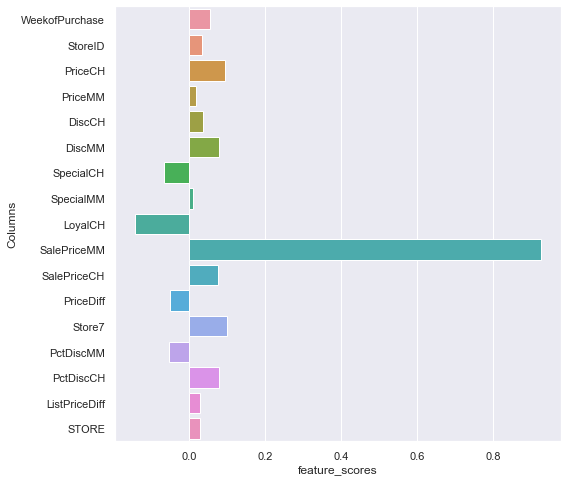

In [240]:
svmmodel = svm.SVC(C=0.01,kernel= 'linear', random_state=1).fit(X_train,y_train)

df7 = pd.DataFrame({'Columns': OJ.drop(['Purchase'],axis=1).columns,'feature_scores': np.ravel(svmmodel.coef_)[1:]})

plt.figure(figsize=(8,8))
sns.barplot(x='feature_scores',y='Columns',data=df7)

**(c) What are the training and test error rates?**

In [242]:
accuracy_train = svmmodel.score(X_train, y_train)
accuracy_test  = svmmodel.score(X_test, y_test)
print(f'train accuracy: {accuracy_train:.3f}')
print(f'test accuracy : {accuracy_test:.3f}')

train accuracy: 0.833
test accuracy : 0.833


**(d) Use the tune() function to select an optimal cost. Consider values in the range 0.01 to 10.**

In [250]:
cost = np.arange(0.01,10.01,0.1)
param_grid  = dict(C=cost)
model_grid = GridSearchCV(svm.LinearSVC(),param_grid,cv = 5, scoring='accuracy',return_train_score=True)
model_grid.fit(X,y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=None,
             param_grid={'C': array([0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91, 1.01,...
       4.41, 4.51, 4.61, 4.71, 4.81, 4.91, 5.01, 5.11, 5.21, 5.31, 5.41,
       5.51, 5.61, 5.71, 5.81, 5.91, 6.01, 6.11, 6.21, 6.31, 6.41, 6.51,
       6.61, 6.71, 6.81, 6.91, 7.01, 7.11, 7.21, 7.31, 7.41, 7.51, 7.61,
       7.71, 7.81, 7.91, 8.01, 8.11, 8.21, 8.31, 8.41, 8.51, 8.61, 8.71,
       8.81, 8.91, 9.01, 9.11, 9.21, 9.31, 9.41, 9.51, 9.61, 9.71, 9.81,
       9.91])},
             pre_dispatch='2*n_jobs', refit=True, return_train_scor

**e) Compute the training and test error rates using this new value for cost.**

In [251]:
accuracy_train = model_grid.score(X_train, y_train)
accuracy_test  = model_grid.score(X_test, y_test)
print(f'train accuracy: {accuracy_train:.3f}')
print(f'test accuracy : {accuracy_test:.3f}')

train accuracy: 0.835
test accuracy : 0.844


**g) Repeat parts (b) through (e) using a support vector machine with a polynomial kernel. Set degree=2.**

In [252]:
C_range     = np.logspace(-2, 1, 10)
param_grid  = dict(C=C_range)
model_grid  = GridSearchCV(svm.SVC(kernel='poly', degree=2), param_grid=param_grid, cv=5, 
                           scoring='accuracy', return_train_score=True)
model_grid.fit(X, y)

accuracy_train = model_grid.score(X_train, y_train)
accuracy_test  = model_grid.score(X_test, y_test)
print(f'train accuracy: {accuracy_train:.3f}')
print(f'test accuracy : {accuracy_test:.3f}')

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarni

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarni

train accuracy: 0.804
test accuracy : 0.767


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


**(f) Repeat parts (b) through (e) using a support vector machine with a radial kernel. Use the default value for gamma.**

In [255]:
C_range = np.logspace(-2,1,10)
param_grid = dict(C=C_range)
model_grid= GridSearchCV(svm.SVC(kernel='rbf'),param_grid,cv=5,scoring='accuracy',return_train_score=True)
model_grid.fit(X,y)

train_score = model_grid.score(X_train,y_train)
test_score = model_grid.score(X_test,y_test)

print(f'train accuracy: {train_score:.3f}')
print(f'test accuracy: {test_score:.3f}')



/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarni

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarni

train accuracy: 0.849
test accuracy: 0.848
